# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarities between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? 

*Note: There is no 100% right answer.*

----

## Imports and Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CIA_Country_Facts.csv')

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Exploratory Data Analysis

### The histogram of the Population

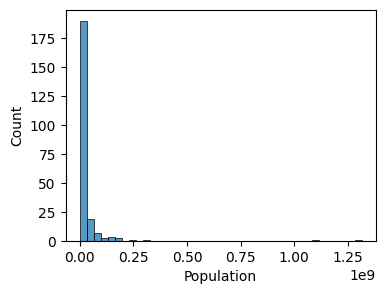

In [6]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Population', bins=40);

### GDP and Regions 

***the black bar represents std***

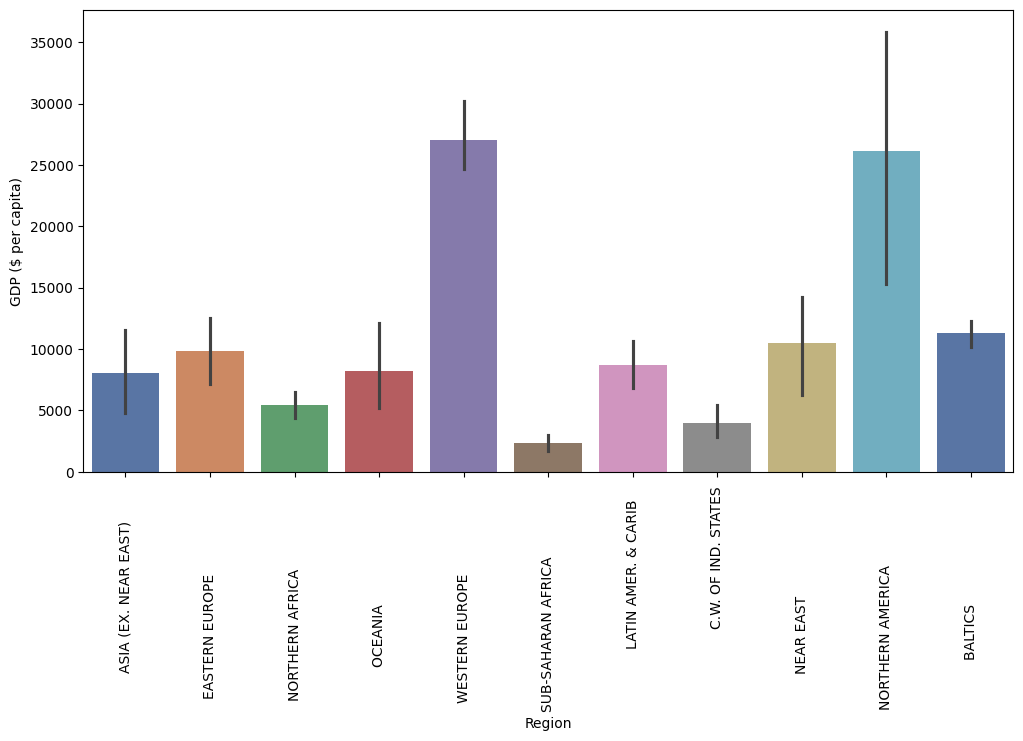

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y='GDP ($ per capita)', hue='Region', palette='deep',)
plt.xticks(rotation=90);

#### The relationship between Phones per 1000 people and the GDP per Capita | Colored by Region

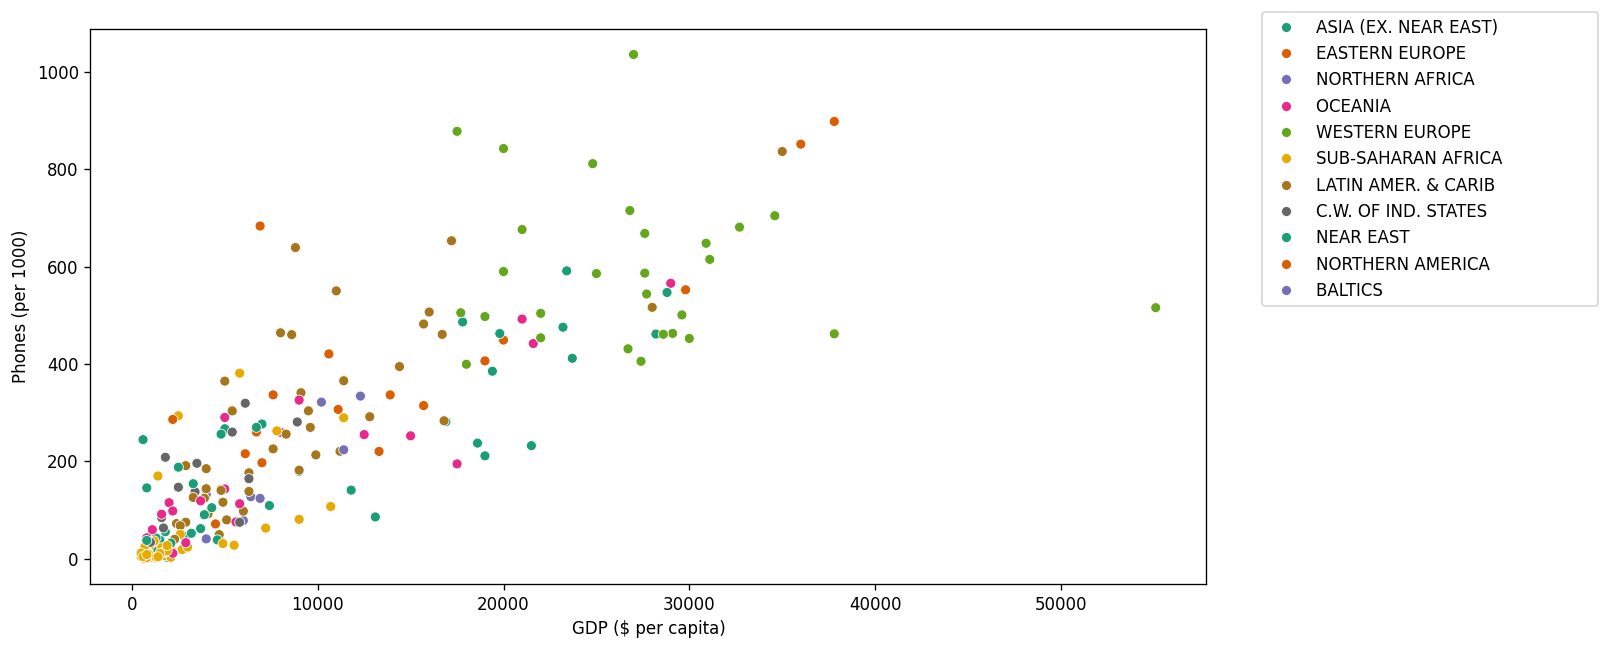

In [8]:
plt.figure(figsize=(12,6), dpi=120)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region', palette='Dark2')
plt.legend(loc=(1.05, .5));	

### The relationship between GDP and Literacy (colored by Region) 

**What conclusions can be drawn from this plot?**

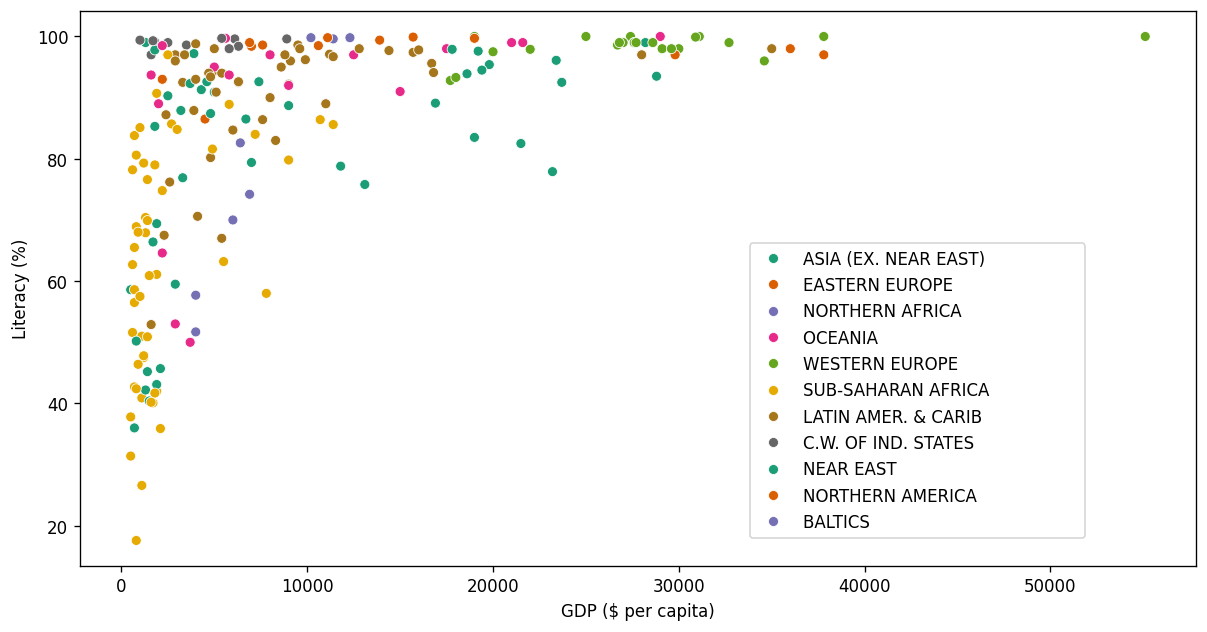

In [9]:
plt.figure(figsize=(12,6), dpi=120)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region', palette='Dark2')
plt.legend(loc=(.6, .05));	

### The Correlation between columns in the DataFrame

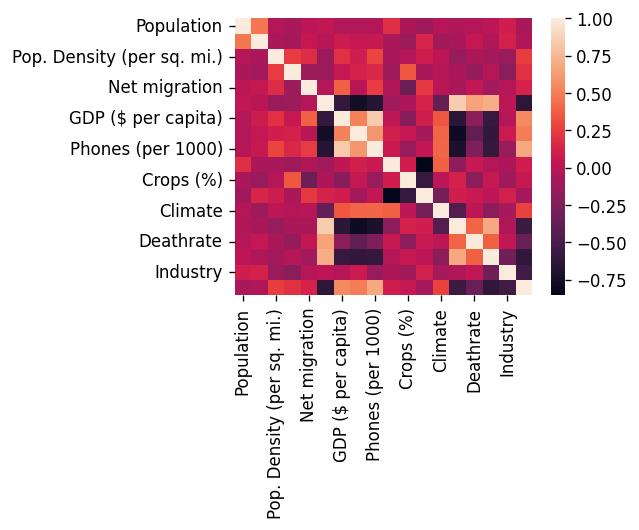

In [10]:
plt.figure(figsize=(4,3), dpi=120)

sns.heatmap(data=df.corr(numeric_only=True));

### Auto-perform hierarchal clustering

<Figure size 480x360 with 0 Axes>

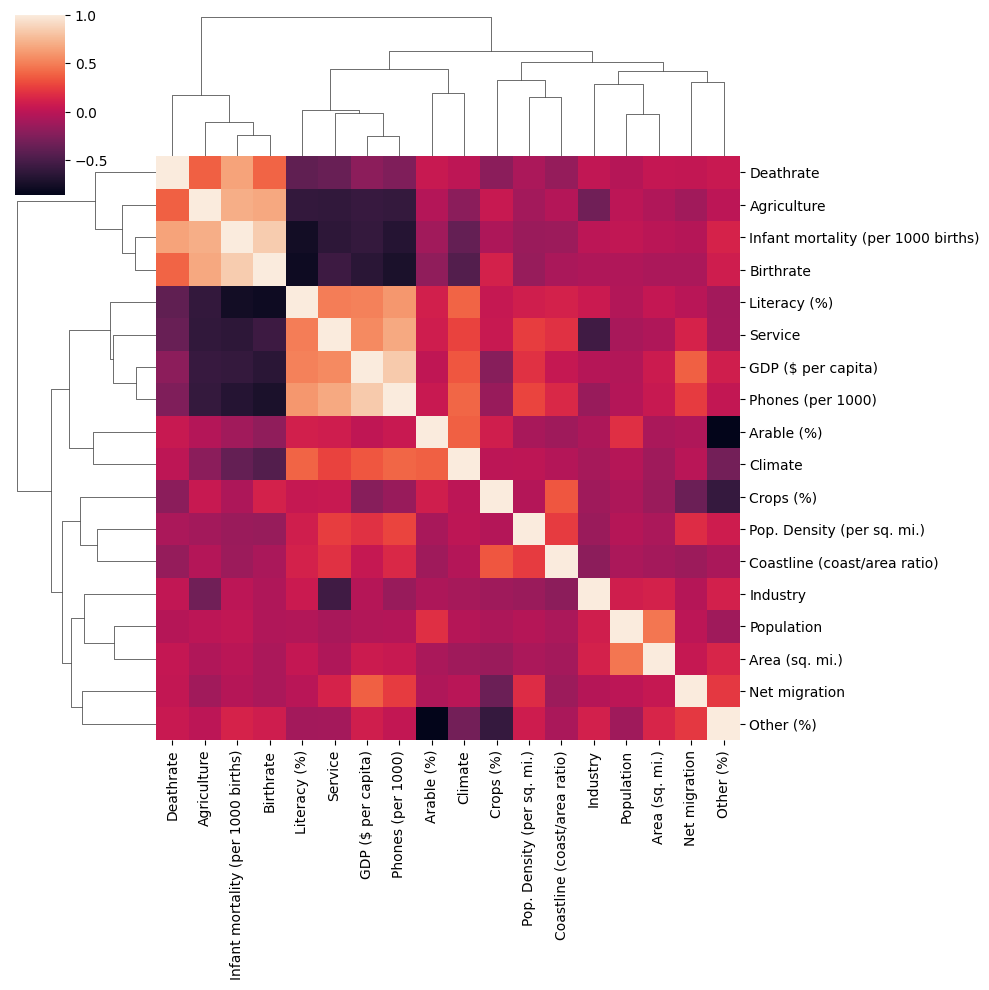

In [11]:
plt.figure(figsize=(4,3), dpi=120)

sns.clustermap(data=df.corr(numeric_only=True));

# Data Preparation and Model Discovery

preparing the data for Kmeans Clustering

### Missing Data

**The missing elements per column.**

In [12]:
df.isnull().sum().sort_values()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
GDP ($ per capita)                     1
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Net migration                          3
Infant mortality (per 1000 births)     3
Birthrate                              3
Phones (per 1000)                      4
Deathrate                              4
Agriculture                           15
Service                               15
Industry                              16
Literacy (%)                          18
Climate                               22
dtype: int64

**What countries have NaN for Agriculture?**

In [13]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**The truth is most of these countries are tiny islands, except Greenland and Western Sahara. Fill any of these countries' missing NaN values with 0, since they are so small or non-existent. There should be 15 countries in total you do this for. For a hint on how to do this, recall you can do the following:**

    df[df['feature'].isnull()]
    

In [14]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [15]:
df.isnull().sum().sort_values()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Agriculture                            0
GDP ($ per capita)                     0
Birthrate                              1
Other (%)                              1
Crops (%)                              1
Service                                1
Industry                               1
Infant mortality (per 1000 births)     1
Net migration                          1
Arable (%)                             1
Phones (per 1000)                      2
Deathrate                              2
Literacy (%)                          13
Climate                               18
dtype: int64

**The climate is missing for a few countries, but not the Region. We will fill in the missing Climate values based on the mean climate value for its region.**

Hints: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [16]:
region_climate = df[['Region', 'Climate']].groupby('Region').mean().reset_index()

In [17]:
region_climate

,Region,Climate
0,ASIA (EX. NEAR EAST),1.962963
1,BALTICS,3.000000
2,C.W. OF IND. STATES,2.550000
3,EASTERN EUROPE,3.111111
4,LATIN AMER. & CARIB,2.033333
5,NEAR EAST,1.666667
6,NORTHERN AFRICA,1.500000
7,NORTHERN AMERICA,1.500000
8,OCEANIA,2.000000
9,SUB-SAHARAN AFRICA,1.846939


In [18]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [19]:
df.isnull().sum().sort_values()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Agriculture                            0
GDP ($ per capita)                     0
Climate                                0
Birthrate                              1
Other (%)                              1
Crops (%)                              1
Service                                1
Industry                               1
Infant mortality (per 1000 births)     1
Net migration                          1
Arable (%)                             1
Phones (per 1000)                      2
Deathrate                              2
Literacy (%)                          13
dtype: int64

**Literacy percentage is missing too. We will use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [20]:
df[['Region', 'Literacy (%)']].groupby('Region').mean()

,Literacy (%)
Region,
ASIA (EX. NEAR EAST),79.553571
BALTICS,99.733333
C.W. OF IND. STATES,98.725000
EASTERN EUROPE,97.088889
LATIN AMER. & CARIB,90.654545
NEAR EAST,79.521429
NORTHERN AFRICA,56.033333
NORTHERN AMERICA,78.200000
OCEANIA,83.900000


In [21]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [22]:
df.isnull().sum().sort_values()

Country                               0
Agriculture                           0
Climate                               0
GDP ($ per capita)                    0
Coastline (coast/area ratio)          0
Literacy (%)                          0
Area (sq. mi.)                        0
Population                            0
Region                                0
Pop. Density (per sq. mi.)            0
Net migration                         1
Infant mortality (per 1000 births)    1
Industry                              1
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Birthrate                             1
Service                               1
Phones (per 1000)                     2
Deathrate                             2
dtype: int64

In [23]:
df.dropna(inplace=True)

---
---


# Data Feature Preparation

**We will prepare the data for clustering. The Country column is a unique identifier string, so it won't be useful for clustering since it is unique for each point. We drop this Country column.**

In [24]:
X = df.drop('Country', axis=1)

### The X array of features 


**The Region column is still categorical strings.**

In [25]:
X = pd.get_dummies(X)

In [26]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


# Scaling

**Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first.**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
X_scaled = sc.fit_transform(X)

In [30]:
X_scaled.shape

(221, 29)

# Fitting Kmeans Model

**We create and fit multiple KMeans models, testing from 2 to 30 clusters. We record the Sum of Squared Distances for each K value, then plot this to create an "elbow" plot of K versus SSD. We also create a bar plot showing the SSD difference from the previous cluster.**

In [31]:
from sklearn.cluster import KMeans

In [32]:
ssd = []

for k in range(2, 30):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0, 0.5, 'SSD')

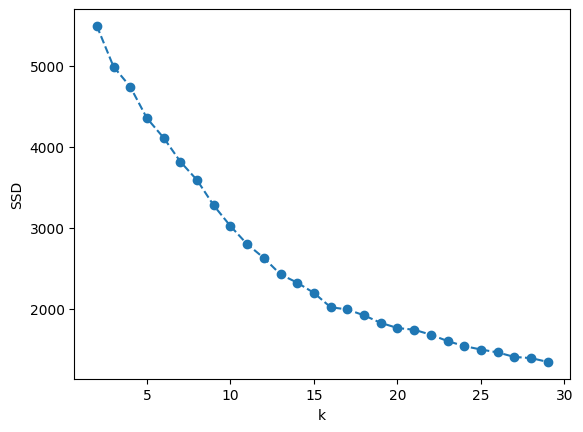

In [33]:
plt.plot(range(2,30), ssd, 'o--')
plt.xlabel('k')
plt.ylabel('SSD')

<Axes: >

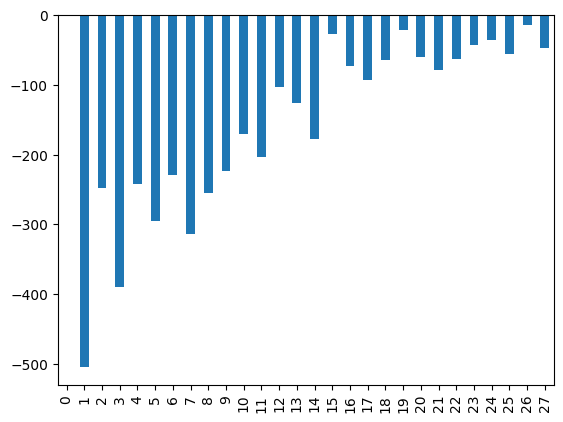

In [34]:
pd.Series(ssd).diff().plot(kind='bar')

# Model Interpretation


##### What K value do you think is a good choice? 

##### Are there multiple reasonable choices? 

##### What features are helping define these cluster choices? 

**Since this is unsupervised learning,  there is no 100% correct answer here.**

-----


#### Example Interpretation: Choosing K=3

**There is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this).** 

What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!

In [35]:
model_3 = KMeans(n_clusters=3, n_init=10)

In [36]:
labels = model_3.fit_predict(X_scaled)

In [37]:
labels

array([0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0], dtype=int32)

In [38]:
X['K=3 Clusters'] = labels

In [39]:
X.corr()['K=3 Clusters'].sort_values()

Deathrate                                    -0.742266
Region_SUB-SAHARAN AFRICA                    -0.722871
Infant mortality (per 1000 births)           -0.566631
Birthrate                                    -0.454945
Agriculture                                  -0.383276
Net migration                                -0.233036
Region_WESTERN EUROPE                        -0.136814
Climate                                      -0.064884
Region_EASTERN EUROPE                        -0.060039
Other (%)                                    -0.057559
Region_BALTICS                               -0.043954
Arable (%)                                   -0.022441
Pop. Density (per sq. mi.)                   -0.015392
GDP ($ per capita)                            0.009047
Region_NORTHERN AMERICA                       0.018208
Area (sq. mi.)                                0.032464
Industry                                      0.042678
Region_ASIA (EX. NEAR EAST)                   0.082214
Population

<Axes: >

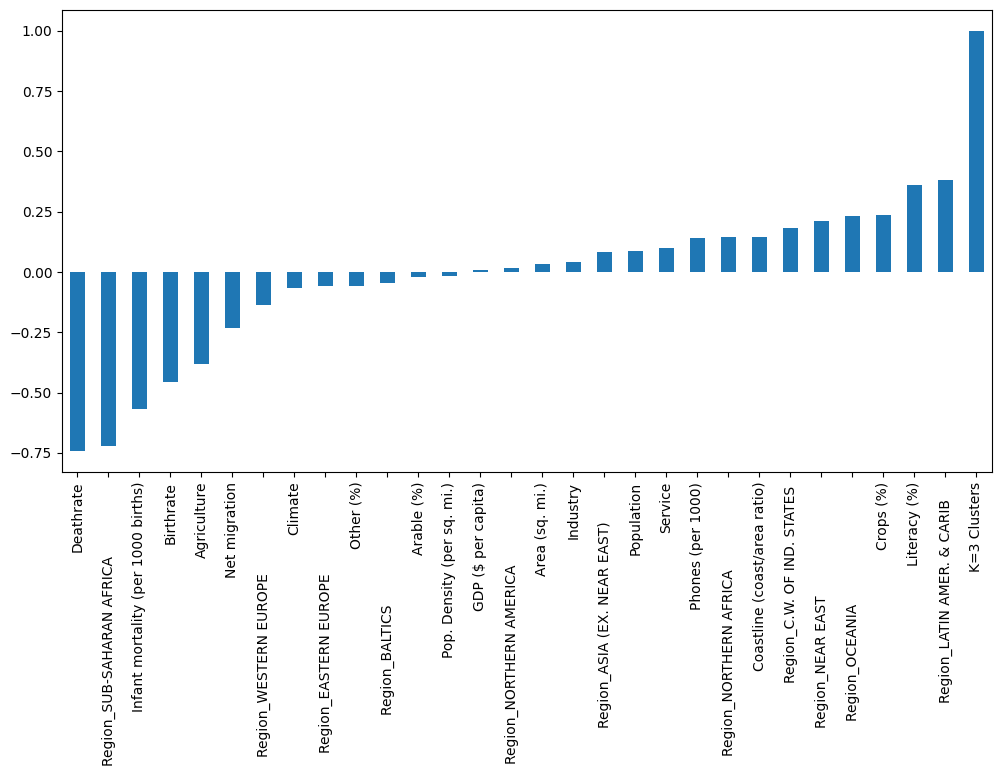

In [40]:
plt.figure(figsize=(12,6))
X.corr()['K=3 Clusters'].sort_values().plot(kind='bar')

------------
-------------

# Geographical Model Interpretation

##### The best way to interpret this model is through visualizing the clusters of countries on a map 



#### we believe either K=3 or K=15 are reasonable choices

In [41]:
model = KMeans(n_clusters=3, n_init=10)

In [42]:
labels_k_3 = model.fit_predict(X_scaled)

In [43]:
model = KMeans(n_clusters=15, n_init=10)

In [44]:
labels_k_15 = model.fit_predict(X_scaled)

#### Steps:

1. Figure out how to install the Plotly library: https://plotly.com/python/getting-started/

2. Figure out how to create a geographical choropleth map using Plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. You will need ISO Codes for this. Either use the Wikipedia page or use the provided file for this: **"country_iso_codes.csv"**

4. Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with Plotly given what you learned in Step 1 and Step 


**Note: This is meant to be a more realistic project, with a clear objective of what you must create and accomplish and the necessary online documentation. It's up to you to piece everything together to figure it out.**



In [45]:
!pip3 install plotly

In [46]:
iso_codes = pd.read_csv('country_iso_codes.csv')

In [47]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [48]:
iso_codes.set_index('Country').head(3)

,ISO Code
Country,
Afghanistan,AFG
"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
Åland Islands,ALA


In [49]:
iso_codes.set_index('Country')['ISO Code']

Country
Afghanistan                                                                                    AFG
Akrotiri and Dhekelia – See United Kingdom, The    Akrotiri and Dhekelia – See United Kingdom, The
Åland Islands                                                                                  ALA
Albania                                                                                        ALB
Algeria                                                                                        DZA
                                                                        ...                       
Congo, Dem. Rep.                                                                               COD
Congo, Repub. of the                                                                           COG
Tanzania                                                                                       TZA
Central African Rep.                                                                           CAF
Co

In [50]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [51]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [52]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [53]:
df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA


In [54]:
df['Cluster K=15']= labels_k_15

In [55]:
df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code,Cluster K=15
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,8
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,3
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,10


In [56]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()